<a href="https://colab.research.google.com/github/danlig94/data_science/blob/master/deep_learning/Keras02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

4423680/4422102 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

(-0.5, 27.5, 27.5, -0.5)

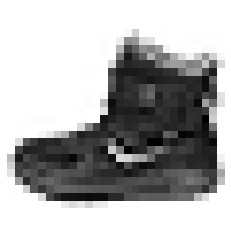

In [5]:
plt.imshow(X_train[0], cmap='Greys')
plt.axis('OFF')

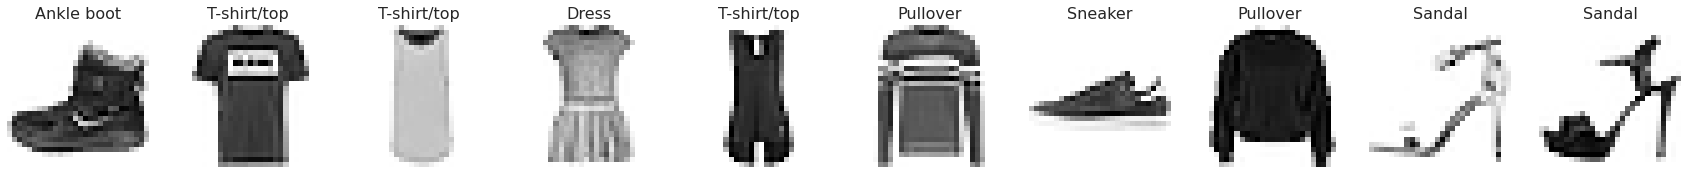

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(30, 30))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[i], cmap='Greys')
  plt.axis('OFF')
  plt.title(class_names[y_train[i]], fontsize=16)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5213 - accuracy: 0.8152 - val_loss: 0.4154 - val_accuracy: 0.8478
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3845 - accuracy: 0.8614 - val_loss: 0.3880 - val_accuracy: 0.8610
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3495 - accuracy: 0.8749 - val_loss: 0.4093 - val_accuracy: 0.8578
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3276 - accuracy: 0.8819 - val_loss: 0.3771 - val_accuracy: 0.8727
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3165 - accuracy: 0.8879 - val_loss: 0.3649 - val_accuracy: 0.8773
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3039 - accuracy: 0.8928 - val_loss: 0.3859 - val_accuracy: 0.8787
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.8968 - val_loss: 0.3942 - val_accuracy:

In [11]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.521312,0.815250,0.415381,0.847750
1,0.384543,0.861396,0.387996,0.861000
2,0.349534,0.874917,0.409322,0.857833
3,0.327631,0.881875,0.377057,0.872667
4,0.316525,0.887854,0.364861,0.877333


In [13]:
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.521312,0.815250,0.415381,0.847750,0
1,0.384543,0.861396,0.387996,0.861000,1
2,0.349534,0.874917,0.409322,0.857833,2
3,0.327631,0.881875,0.377057,0.872667,3
4,0.316525,0.887854,0.364861,0.877333,4
5,0.303897,0.892812,0.385906,0.878667,5
6,0.295194,0.896771,0.394221,0.872500,6
7,0.287906,0.899417,0.366404,0.882583,7
8,0.281081,0.902062,0.361730,0.882167,8
9,0.272967,0.905354,0.378647,0.884083,9


In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(test_acc)

0.8723000288009644


In [17]:
pred_cls = model.predict_classes(X_test)
pred_cls

array([9, 2, 1, ..., 8, 1, 5])

In [18]:
pred = pd.DataFrame({'y_true': y_test, 'y_pred': pred_cls})
pred.head()

,y_true,y_pred
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [19]:
pred_false = pred[pred['y_true']!=pred['y_pred']]
pred_false.head()

,y_true,y_pred
12,7,5
17,4,2
23,9,5
25,4,6
40,6,0


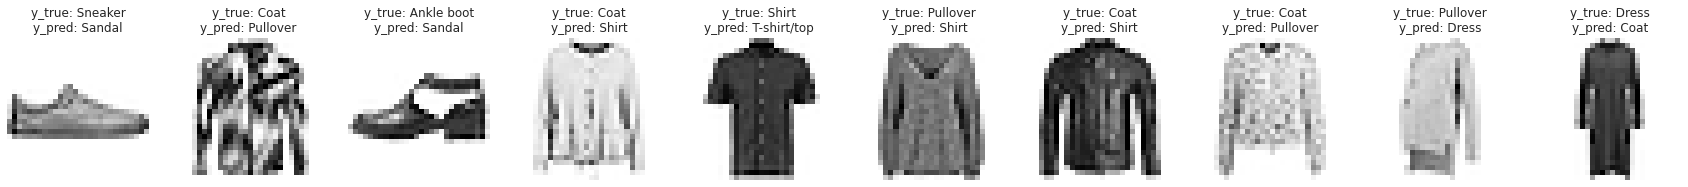

In [20]:
plt.figure(figsize=(30, 30))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_test[pred_false.index[i]], cmap='Greys')
  plt.axis('OFF')
  plt.title('y_true: {}\ny_pred: {}\nproba:'.format(class_names[pred_false.iloc[i, 0]], class_names[pred_false.iloc[i, 1]]))

In [21]:
pred_proba = model.predict(X_test)
pred_proba

array([[0.00000000191 , 0.000000000002, 0.000000000007, ..., 0.0023137934  , 0.00000127484 , 0.9970772     ],
       [0.00000130527 , 0.            , 0.9985983     , ..., 0.000000000016, 0.000000000012, 0.            ],
       [0.000000000002, 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.0005215959  , 0.            , 0.000050320337, ..., 0.            , 0.9992756     , 0.            ],
       [0.000000000009, 0.99999774    , 0.            , ..., 0.000000000001, 0.            , 0.000000000014],
       [0.000001694703, 0.000000850707, 0.000000785431, ..., 0.010776587   , 0.00026604783 , 0.000021735128]], dtype=float32)

In [28]:
pred_proba_false = pd.DataFrame(pred_proba[pred_false.index])
pred_proba_false.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.970479,0.000000,0.027379,0.002142,0.000000
1,0.001411,0.000000,0.825563,0.000003,0.111406,0.000000,0.061569,0.000000,0.000047,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.988214,0.000000,0.000621,0.000011,0.011153
3,0.000633,0.000067,0.230429,0.004463,0.379579,0.000004,0.384704,0.000000,0.000120,0.000001
4,0.591168,0.000000,0.000001,0.000090,0.000000,0.000000,0.408741,0.000000,0.000000,0.000000


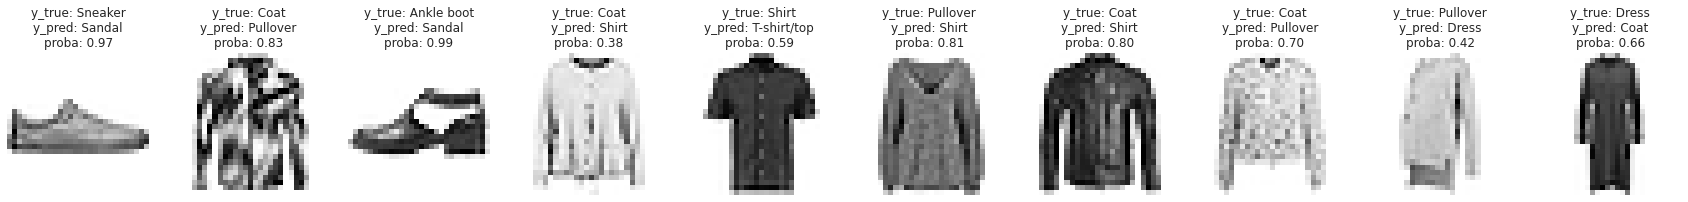

In [37]:
plt.figure(figsize=(30, 30))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_test[pred_false.index[i]], cmap='Greys')
  plt.axis('OFF')
  plt.title('y_true: {}\ny_pred: {}\nproba: {:.2f}'.format(class_names[pred_false.iloc[i, 0]], class_names[pred_false.iloc[i, 1]], pred_proba_false.T[i].max()))